In [1]:
pip install vk_api

In [89]:
import vk_api
import networkx as nx
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import random

In [2]:
def auth_handler():
    """ При двухфакторной аутентификации вызывается эта функция.
    """

    # Код двухфакторной аутентификации
    key = input("Enter authentication code: ")
    # Если: True - сохранить, False - не сохранять.
    remember_device = False

    return key, remember_device

login, password = '', ''
vk_session = vk_api.VkApi(login, password, auth_handler=auth_handler)

vk_session.auth()

vk = vk_session.get_api()

In [3]:
my_id = 52510397
nodes = vk.friends.get(user_id=my_id)['items']
print(nodes)

[776975, 802486, 2172653, 2527450, 5970290, 6119555, 8405773, 10429782, 10434609, 10525615, 10584971, 11819900, 12798099, 13183951, 14950854, 16335998, 17585242, 18031725, 18582749, 21490571, 22819640, 24790214, 29151208, 30232332, 30898642, 31771693, 31858003, 32509881, 32519663, 33587897, 36221726, 36764803, 37383953, 39647414, 41730619, 41789452, 45054424, 45983692, 47724015, 50367001, 50629388, 53659952, 53880665, 54096201, 55297827, 56046250, 56568147, 58699146, 59275393, 61632738, 62423089, 64725705, 66810241, 67264131, 67436099, 67846862, 71617360, 72496224, 73025888, 74269505, 75652226, 76718224, 78489330, 81704210, 83000886, 83752659, 83776805, 84661097, 84795172, 86887392, 87611522, 88110672, 88437157, 89909359, 90040613, 91471404, 95204061, 95480116, 96184959, 96331475, 97494105, 97848707, 98242899, 99650590, 101077390, 101123645, 101288881, 103204744, 108120202, 112860121, 116607334, 119278589, 119440628, 120266299, 120699597, 120743116, 122739678, 122754071, 123478103, 126

In [4]:
friends_of_friends = []

for i in range(len(nodes)):
    print(i)
    friends_of_friends.append(vk.friends.get(user_id=nodes[i])['items'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
friends_of_friends[0]

[11,
 476,
 1805,
 3589,
 4247,
 7683,
 9895,
 21554,
 26012,
 32084,
 43455,
 45171,
 47383,
 50601,
 58624,
 58801,
 63849,
 65381,
 69693,
 70019,
 84209,
 90083,
 98918,
 113567,
 116712,
 117224,
 120176,
 133073,
 133362,
 135367,
 135837,
 147346,
 170381,
 175083,
 207106,
 208145,
 217487,
 220265,
 230455,
 246505,
 286315,
 294851,
 304883,
 312279,
 316184,
 316626,
 318944,
 319562,
 325325,
 343657,
 349864,
 352043,
 365236,
 381577,
 386201,
 392998,
 393017,
 398218,
 404994,
 412557,
 422044,
 423432,
 423919,
 441418,
 453724,
 463002,
 463184,
 464017,
 467603,
 479542,
 486242,
 495075,
 504574,
 533309,
 546612,
 554544,
 573420,
 587501,
 628214,
 643950,
 672730,
 705353,
 710444,
 731842,
 759361,
 762760,
 777704,
 800035,
 800526,
 813567,
 824053,
 879656,
 884252,
 894368,
 910544,
 971424,
 974884,
 1000704,
 1004996,
 1039297,
 1098310,
 1104498,
 1149537,
 1201613,
 1212995,
 1265433,
 1270794,
 1273485,
 1295460,
 1299584,
 1312743,
 1313977,
 1322521,


In [17]:
edges = []
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if nodes[j] in friends_of_friends[i]:
            edges.append((nodes[i], nodes[j]))

In [18]:
edges

[(776975, 18582749),
 (802486, 22819640),
 (802486, 73025888),
 (802486, 98242899),
 (802486, 191693058),
 (2172653, 31771693),
 (2172653, 36764803),
 (2172653, 157693632),
 (2172653, 160371151),
 (2527450, 6119555),
 (2527450, 16335998),
 (2527450, 22819640),
 (2527450, 32509881),
 (2527450, 67436099),
 (2527450, 136188193),
 (2527450, 254172726),
 (5970290, 172931604),
 (6119555, 12798099),
 (6119555, 16335998),
 (6119555, 21490571),
 (6119555, 22819640),
 (6119555, 32509881),
 (6119555, 142590816),
 (6119555, 156089184),
 (6119555, 215212320),
 (8405773, 83776805),
 (8405773, 84795172),
 (8405773, 88110672),
 (8405773, 160371151),
 (8405773, 160526050),
 (8405773, 184616742),
 (8405773, 300051347),
 (8405773, 303471887),
 (10429782, 67436099),
 (10429782, 154293606),
 (10434609, 45054424),
 (10434609, 153347592),
 (10525615, 74269505),
 (10525615, 88110672),
 (10525615, 91471404),
 (10525615, 289797558),
 (10584971, 132448817),
 (10584971, 157693632),
 (10584971, 196192470),
 (10584

In [19]:
len(edges) # I compared with graph given by "Export friends graph" to confirm correctness. They are the same. 

2210

In [24]:
G=nx.DiGraph()

G.add_nodes_from(nodes)

G.add_edges_from(edges)

In [27]:
G.in_edges()

InEdgeView([(18582749, 776975), (22819640, 802486), (73025888, 802486), (98242899, 802486), (191693058, 802486), (31771693, 2172653), (36764803, 2172653), (157693632, 2172653), (160371151, 2172653), (16335998, 2527450), (22819640, 2527450), (32509881, 2527450), (67436099, 2527450), (136188193, 2527450), (254172726, 2527450), (172931604, 5970290), (2527450, 6119555), (12798099, 6119555), (16335998, 6119555), (21490571, 6119555), (22819640, 6119555), (32509881, 6119555), (142590816, 6119555), (156089184, 6119555), (215212320, 6119555), (83776805, 8405773), (84795172, 8405773), (88110672, 8405773), (160371151, 8405773), (160526050, 8405773), (184616742, 8405773), (300051347, 8405773), (303471887, 8405773), (67436099, 10429782), (154293606, 10429782), (45054424, 10434609), (153347592, 10434609), (74269505, 10525615), (88110672, 10525615), (91471404, 10525615), (289797558, 10525615), (132448817, 10584971), (157693632, 10584971), (196192470, 10584971), (435665464, 10584971), (18582749, 11819

In [15]:
nx.write_gexf(G, "directed_version.gexf") # save to complete future tasks later

NameError: name 'G' is not defined

In [16]:
G_1 = nx.read_gexf("directed_version.gexf")
G_1.in_edges()

InEdgeView([('18582749', '776975'), ('22819640', '802486'), ('73025888', '802486'), ('98242899', '802486'), ('191693058', '802486'), ('31771693', '2172653'), ('36764803', '2172653'), ('157693632', '2172653'), ('160371151', '2172653'), ('16335998', '2527450'), ('22819640', '2527450'), ('32509881', '2527450'), ('67436099', '2527450'), ('136188193', '2527450'), ('254172726', '2527450'), ('172931604', '5970290'), ('2527450', '6119555'), ('12798099', '6119555'), ('16335998', '6119555'), ('21490571', '6119555'), ('22819640', '6119555'), ('32509881', '6119555'), ('142590816', '6119555'), ('156089184', '6119555'), ('215212320', '6119555'), ('83776805', '8405773'), ('84795172', '8405773'), ('88110672', '8405773'), ('160371151', '8405773'), ('160526050', '8405773'), ('184616742', '8405773'), ('300051347', '8405773'), ('303471887', '8405773'), ('67436099', '10429782'), ('154293606', '10429782'), ('45054424', '10434609'), ('153347592', '10434609'), ('74269505', '10525615'), ('88110672', '10525615'

In [11]:
G_1.number_of_nodes()

321

In [17]:
G = G_1.to_undirected() # I dealt with directed version of graph at first. But it is too hard, so it doesn't really make sense. 

In [18]:
G.edges()

EdgeView([('776975', '18582749'), ('802486', '22819640'), ('802486', '73025888'), ('802486', '98242899'), ('802486', '191693058'), ('2172653', '31771693'), ('2172653', '36764803'), ('2172653', '157693632'), ('2172653', '160371151'), ('2527450', '6119555'), ('2527450', '16335998'), ('2527450', '22819640'), ('2527450', '32509881'), ('2527450', '67436099'), ('2527450', '136188193'), ('2527450', '254172726'), ('5970290', '172931604'), ('6119555', '12798099'), ('6119555', '16335998'), ('6119555', '21490571'), ('6119555', '22819640'), ('6119555', '32509881'), ('6119555', '142590816'), ('6119555', '156089184'), ('6119555', '215212320'), ('8405773', '83776805'), ('8405773', '84795172'), ('8405773', '88110672'), ('8405773', '160371151'), ('8405773', '160526050'), ('8405773', '184616742'), ('8405773', '300051347'), ('8405773', '303471887'), ('10429782', '67436099'), ('10429782', '154293606'), ('10434609', '45054424'), ('10434609', '153347592'), ('10525615', '74269505'), ('10525615', '88110672'),

In [19]:
G.number_of_edges()

1115

1

∙ Network source and preprocessing

∙ Node/Edge attributes

∙ Size, Order

∙ Gorgeous network layout. Try to show that your network has some structure, play with node sizes and colors, scaling parameters, tools like Gephi may be useful here

∙ Degree distribution, Shortest Path distribution, Diameter, Radius, Clustering Coefficients (local distribution and global)

I took data from VK, which is a Russian social network. I loaded ids of all my friends and checked who is friend to whom. The only tool from VK API I needed was function friends.get. So nodes are ids and edges are pairs of ids in format: (whose friends list, who is in it from the list of my friends). I dealt with directed version of graph at first. But it was too hard, so it didn't really make sense. I converted graph to undirected format. There are 321 friends, who are equal to nodes, and 1115 pairs of friends, which are equal to directed edges, so order is 321 and size is 1115. 

In [18]:
nx.write_gexf(G, "Undirected_version.gexf")

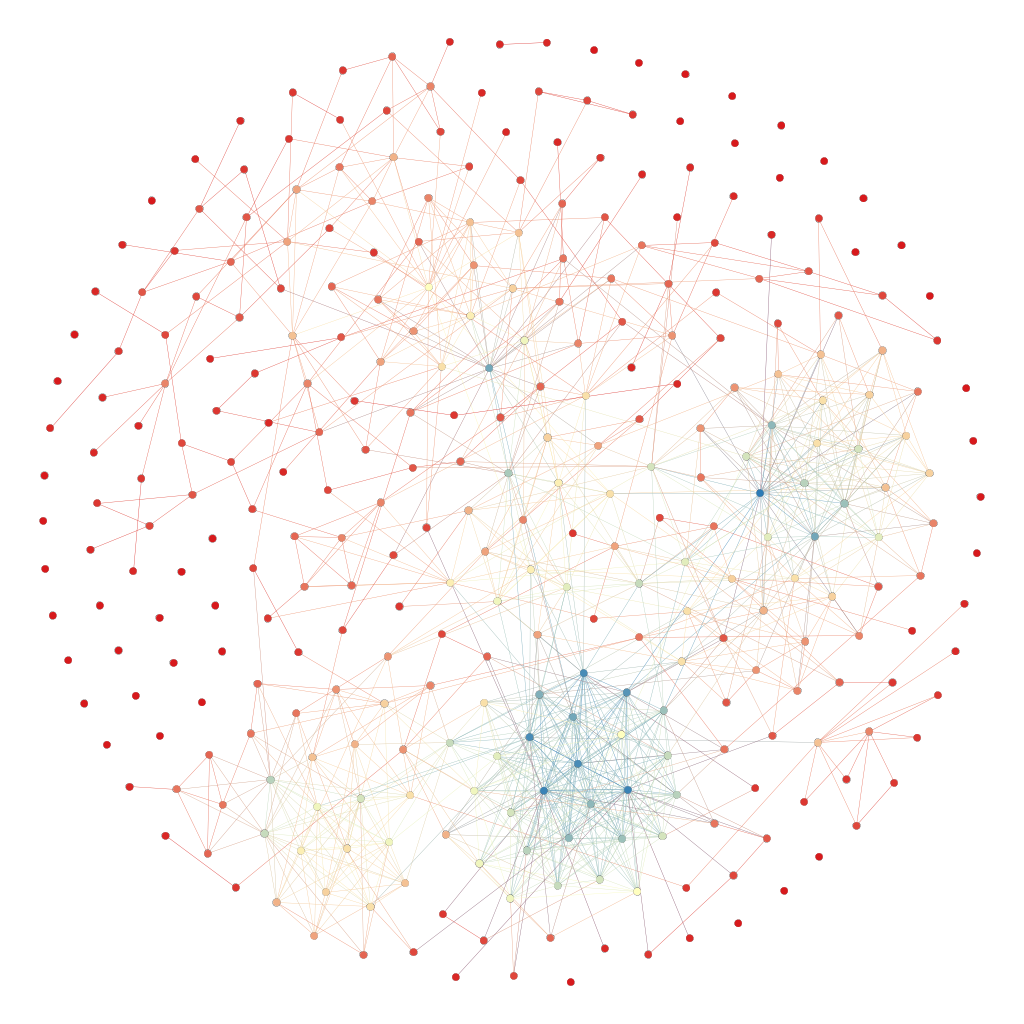

In [132]:
display.Image("./undir_graph_of_friends.png")
# I used Gephi to show the network layout. The Fruchterman Reingold algorithm seemed to me suitabe for the graph of friends.
# We can see some big and small communities. Some people have mSome people have lots of friends in common with me, while others aren't friend with anyone.  common friends with me, while others don't friend with anyone. 

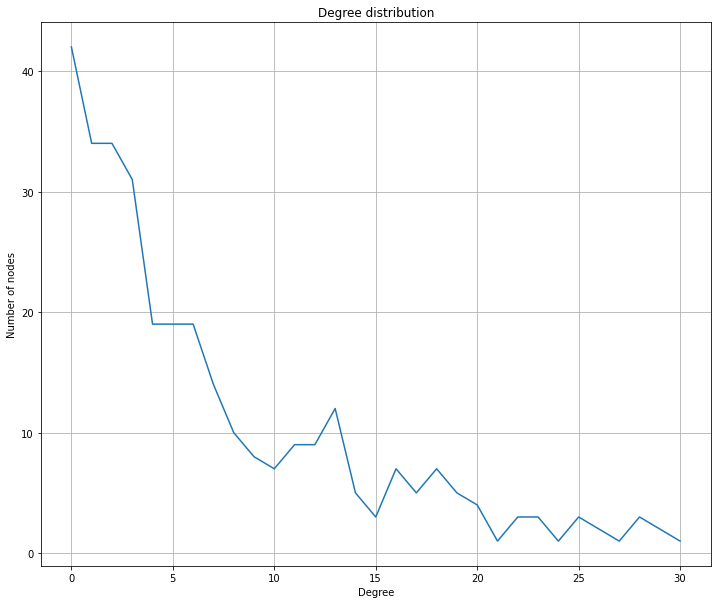

In [21]:
# https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf
# https://mathinsight.org/degree_distribution
# http://www2.unb.ca/~ddu/6634/Lecture_notes/Lec3_network_statistics_handout.pdf

# from collections import OrderedDict

# in_degrees = dict(G_1.in_degree())
# in_values = sorted(set(in_degrees.values()))
# in_hist = [list(in_degrees.values()).count(x) for x in in_values]

# out_degrees = dict(G_1.out_degree())
# out_values = sorted(set(out_degrees.values()))
# out_hist = [list(out_degrees.values()).count(x) for x in out_values]

# total_degrees = {}
# for key in in_degrees:
#     total_degrees[key] = in_degrees[key] + out_degrees[key]
# total_values = sorted(set(total_degrees.values()))
# total_hist = [list(total_degrees.values()).count(x) for x in total_values]

# in_degrees = OrderedDict(sorted(in_degrees.items(), key=lambda t: t[0]))
# out_degrees = OrderedDict(sorted(out_degrees.items(), key=lambda t: t[0]))
# df = pd.DataFrame({'node':in_degrees.keys(), 'in_degree':in_degrees.values(), 'out_degree':out_degrees.values()})
# print(df)

# plt.figure(figsize=(12, 10))
# plt.grid(True)
# plt.plot(in_values, in_hist, 'ro-') # in-degree
# plt.plot(out_values, out_hist, 'gv-') # out-degree
# plt.plot(total_values, total_hist, 'bs-')# total-degree
# plt.legend(['In-degree', 'Out-degree', 'Total-degree'])
# plt.xlabel('Degree')
# plt.ylabel('Number of nodes')
# plt.title('Degree distribution')
# plt.show()

degrees = dict(G.degree())
values = sorted(set(degrees.values()))
hist = [list(degrees.values()).count(x) for x in values]

plt.figure(figsize=(12, 10))
plt.grid(True)
plt.plot(values, hist)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution')
plt.show()

# Real world networks usually have very different degree distributions. 
# In a real world network, most nodes have a relatively small degree, but a few nodes will have very large degree,
# being connected to many other nodes. 
# So we can see that my graph of friends is a typical real world network.
# It is quite obvious that some people are more outgoing and have significantly more friends than others.

           776975  802486  2172653  2527450  5970290  6119555  8405773  \
776975          0       4        5        6        0        5        5   
802486          4       0        3        2        0        2        4   
2172653         5       3        0        3        0        4        2   
2527450         6       2        3        0        0        1        4   
5970290         0       0        0        0        0        0        0   
...           ...     ...      ...      ...      ...      ...      ...   
555122635       0       0        0        0        0        0        0   
557808237       2       4        5        6        0        5        5   
568717114       0       0        0        0        0        0        0   
579656092       2       4        5        6        0        5        5   
581100944       3       5        6        7        0        6        6   

           10429782  10434609  10525615  ...  484771780  485311208  531319559  \
776975            6         8 

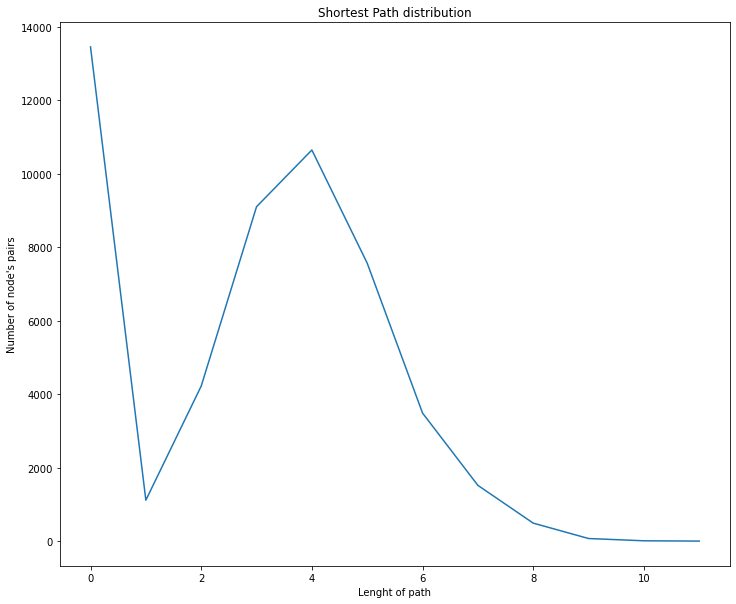

In [35]:
future_matrix = dict(nx.shortest_path_length(G))
rows_and_cols = future_matrix.keys()
df_shortest_path = pd.DataFrame(0, columns=rows_and_cols, index=rows_and_cols)
for key_1 in rows_and_cols:
    for key_2 in future_matrix[key_1]:
        df_shortest_path.loc[key_1, key_2] = future_matrix[key_1][key_2]
        
print(df_shortest_path)

all_short_pathes = df_shortest_path.values[np.tril_indices(df_shortest_path.values.shape[0])] # 321*320/2 + 321 = 51681
if len(all_short_pathes) != 51681:
    print('ERROR!')
unique_pathes = sorted(set(all_short_pathes))
pathes_hist = [list(all_short_pathes).count(x) for x in unique_pathes]

plt.figure(figsize=(12, 10))
plt.plot(unique_pathes, pathes_hist)
plt.xlabel('Lenght of path')
plt.ylabel('Number of node\'s pairs')
plt.title('Shortest Path distribution')
plt.show()

# A large number of pairs have zero path length, which means there is no path between them. 
# The fact that there are more such lengths than the rest is logical, because friends can be from school,
# from a camp, from a student organization and, accordingly, they do not know each other.
# The graph has few edges and vertices with a large degree, so paths between vertices are generally 2 to 6 in length.

In [130]:
print('Diameter of connected components with 2+ nodes:', [nx.diameter(G.subgraph(gr)) for gr in nx.connected_components(G) if len(gr) > 1])
# Since the graph is not connected, the diameter of the graph is assumed to be the largest diameter of its connected components.
# The diameter is large, which tells us that the graph has few edges.

Diameter of connected components with 2+ nodes: [11, 1]


In [131]:
print('Radius of connected components with 2+ nodes::', [nx.radius(G.subgraph(gr)) for gr in nx.connected_components(G) if len(gr) > 1])
# A large radius again indicates that the graph has few edges.

Radius of connected components with 2+ nodes:: [6, 1]


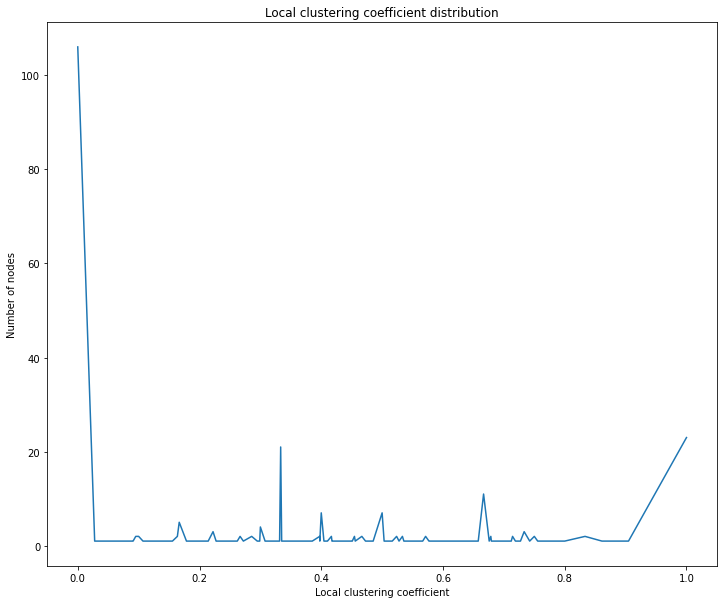

In [55]:
# local distribution

values = nx.clustering(G)

coefs = dict(nx.clustering(G))
values = sorted(set(coefs.values()))
hist = [list(coefs.values()).count(x) for x in values]

plt.figure(figsize=(12, 10))
plt.plot(values, hist)
plt.xlabel('Local clustering coefficient')
plt.ylabel('Number of nodes')
plt.title('Local clustering coefficient distribution')
plt.show()

# We can see that there are dense groups of people with a high local clustering coefficient, 
# but most have a low local clustering coefficient, which means that we are dealing with a sparse graph.

In [79]:
# counting global clustering coefficient

glc = 0

for node in G.nodes():
    neighbours = [n for n in G.neighbors(node)] 
    if len(neighbours) >= 2:
        all_duplets = list(itertools.combinations(neighbours, 2))
        triangles = 0
        for duplet in all_duplets:
            if G.has_edge(node, duplet[0]) and G.has_edge(node, duplet[1]) and G.has_edge(duplet[0], duplet[1]):
                triangles += 1
        glc += triangles / len(all_duplets)
        
print('Global clustering coefficient:', glc / len(G.nodes()))

# a low global clustering coefficient indicates a sparse graph

Global clustering coefficient: 0.33793251395044543


2. 


∙Degree/Closeness/Betweenness centralities. Top nodes interpretation

∙Page-Rank. Comparison with centralities

∙Assortative Mixing according to node attributes

∙Node structural equivalence/similarity

∙The closest random graph model similar to your SN

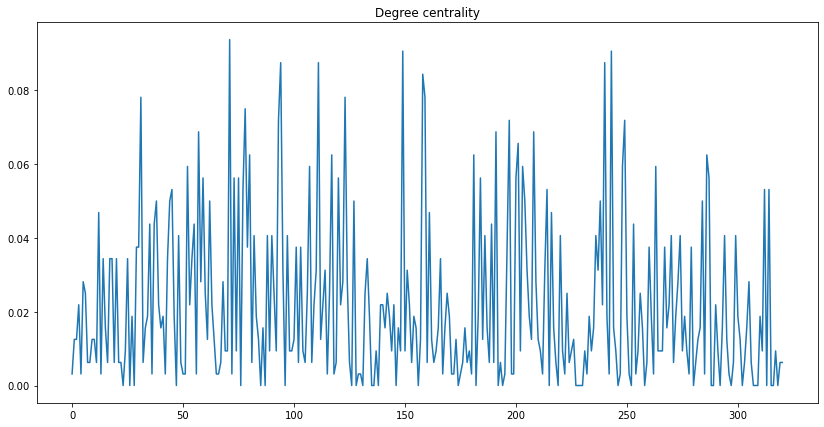

Average degree centrality value: 0.021709501557632394


In [84]:
fig = plt.figure(figsize=(14,7))

dc = list(nx.degree_centrality(G).values())
plt.plot(dc)
plt.title('Degree centrality')
plt.show()

print('Average degree centrality value:', sum(el for el in dc) / len(dc))

# The degree centrality for a node v is the fraction of nodes it is connected to.
# We can see that the average degree centrality value is very small, which means that the nodes have a low degree.
# The maximum does not even reach 0.1, but, as mentioned earlier, there are different groups of people that often do not intersect.

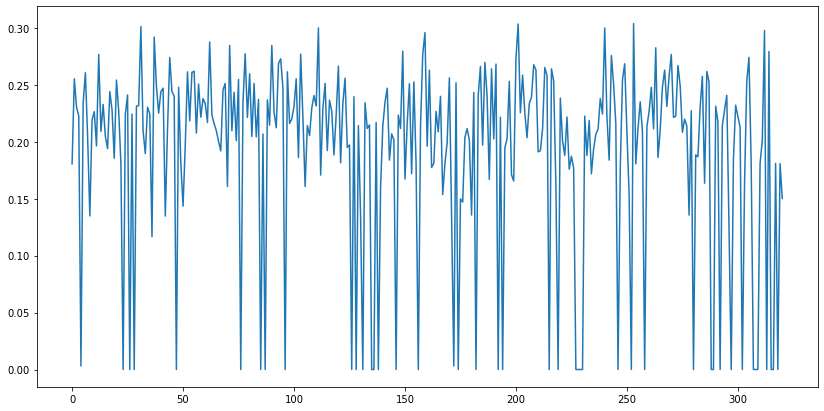

Average closeness centrality value: 0.19127004182181562


In [86]:
fig = plt.figure(figsize=(14,7))

cc = list(nx.closeness_centrality(G).values())
plt.plot(cc)
plt.show()

print('Average closeness centrality value:', sum(el for el in cc) / len(cc))

# The more central a node is, the closer it is to all other nodes.
# Closeness centrality takes small values from which it can be concluded that there are no leaders who are familiar with many people. 

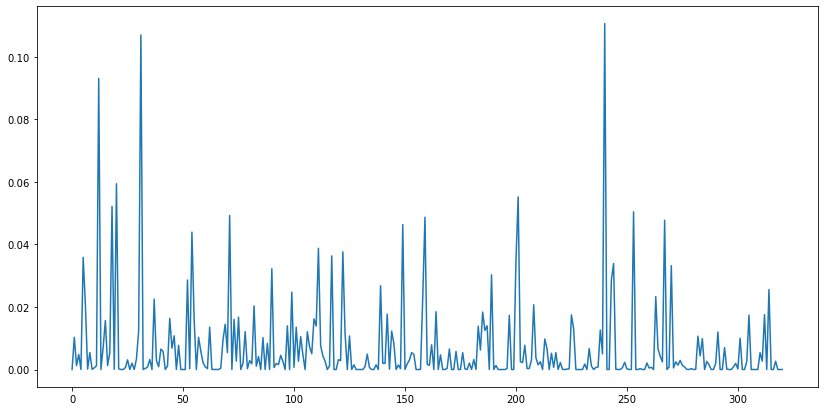

Average betweenness centrality value: 0.007035102881864077


In [87]:
fig = plt.figure(figsize=(14,7))

bc = list(nx.betweenness_centrality(G).values())
plt.plot(bc)
plt.show()

print('Average betweenness centrality value:', sum(el for el in bc) / len(bc))

# Betweenness is a centrality measure of a vertex within a graph
# Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes
# You can see several prominent nodes, but for the reasons mentioned earlier, the values of betweenness centrality are quite small.

In [23]:
dc_threshold = 0.06
dc = np.array(list(nx.degree_centrality(G).values()))
dc_top_nodes_values = dc[(dc > dc_threshold)]
dc_top_nodes = []
for key, val in dict(nx.degree_centrality(G)).items():
    if val in dc_top_nodes_values:
        dc_top_nodes.append(key)

cc_threshold = 0.28
cc = np.array(list(nx.closeness_centrality(G).values()))
cc_top_nodes_values = cc[(cc > cc_threshold)]
cc_top_nodes = []
for key, val in dict(nx.closeness_centrality(G)).items():
    if val in cc_top_nodes_values:
        cc_top_nodes.append(key)

bc_threshold = 0.05
bc = np.array(list(nx.betweenness_centrality(G).values()))
bc_top_nodes_values = bc[(bc > bc_threshold)]
bc_top_nodes = []
for key, val in dict(nx.betweenness_centrality(G)).items():
    if val in bc_top_nodes_values:
        bc_top_nodes.append(key)

print('intersection of top nodes:', set(dc_top_nodes).intersection(set(cc_top_nodes)).intersection(set(bc_top_nodes)))

intersection of top nodes: {'36764803', '191693058', '244661037'}


Top nodes interpretation

I selected top nodes by thresholds. The thresholds were chosen by eye. There are three nodes, which are top in all centralities.

There are some leaders in all centralities. In degree centrality leaders have more friends than others. In closeness centrality leaders are closer to the rest of the people, I mean, on average, they have short (relative to others) paths to others. In betweenness centrality leaders are often (relative to others) part of the shortest path between others.

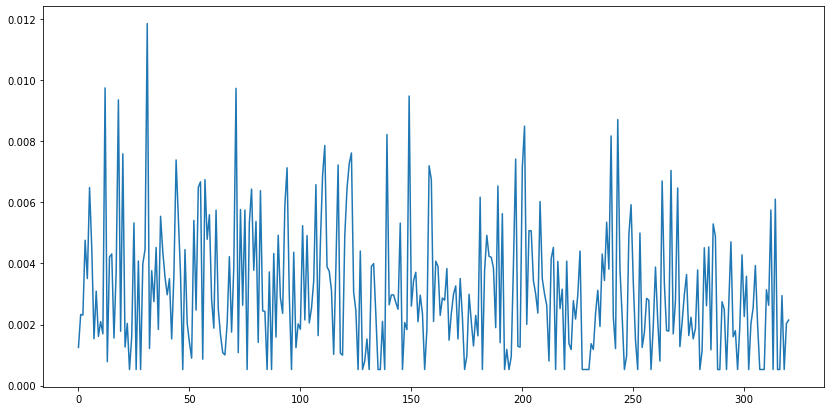

Average pagerank value: 0.003115264797507786


In [89]:
nx.pagerank(G)

fig = plt.figure(figsize=(14,7))

pr = list(nx.pagerank(G).values())
plt.plot(pr)
plt.show()

print('Average pagerank value:', sum(el for el in pr) / len(pr))

# PageRank is a way of measuring the importance of website pages.
# Pr values are small, but there are several important nodes.

In [27]:
pr_threshold = 0.008
pr = np.array(list(nx.pagerank(G).values()))
pr_top_nodes_values = pr[(pr > pr_threshold)]
pr_top_nodes = []
for key, val in dict(nx.pagerank(G)).items():
    if val in pr_top_nodes_values:
        pr_top_nodes.append(key)
print(set(dc_top_nodes).intersection(set(cc_top_nodes)).intersection(set(bc_top_nodes)).intersection(set(pr_top_nodes)))

{'36764803', '191693058', '244661037'}


We can see that the same nodes as in the centralities intersection have top pagerank values. It's pretty obvious that these nodes are in the center of the clusters.

In [34]:
nx.set_node_attributes(G, nx.pagerank(G), "pagerank")
nx.attribute_assortativity_coefficient(G, 'pagerank')

-0.003624324865782612

In [45]:
nx.set_node_attributes(G, dict(G.degree()), "degree")
nx.attribute_assortativity_coefficient(G, 'degree')

0.007639249425202113

In [3]:
token = ''
vk_session = vk_api.VkApi(token = token)

vk = vk_session.get_api()

In [8]:
my_id = 52510397
attr = vk.friends.get(user_id=my_id, fields = 'education, sex, relation, universities')['items']

In [37]:
university = dict()
faculty = dict()
sex = dict()
relation = dict()

for i in range(len(attr)):
    university[str(attr[i]['id'])] = attr[i].get('university') if attr[i].get('university') is not None else 0
    faculty[str(attr[i]['id'])] = attr[i].get('faculty') if attr[i].get('faculty') is not None else 0
    sex[str(attr[i]['id'])] = attr[i].get('sex') if attr[i].get('sex') is not None else 0
    relation[str(attr[i]['id'])] = attr[i].get('relation') if attr[i].get('relation') is not None else 0

In [38]:
sex

{'776975': 2,
 '802486': 2,
 '2172653': 2,
 '2527450': 2,
 '5970290': 2,
 '6119555': 2,
 '8405773': 1,
 '10429782': 2,
 '10434609': 2,
 '10525615': 2,
 '10584971': 2,
 '11819900': 1,
 '12798099': 2,
 '13183951': 2,
 '14950854': 2,
 '16335998': 2,
 '17585242': 1,
 '18031725': 2,
 '18582749': 1,
 '21490571': 2,
 '22819640': 2,
 '24790214': 2,
 '29151208': 1,
 '30232332': 1,
 '30898642': 2,
 '31771693': 1,
 '31858003': 2,
 '32509881': 2,
 '32519663': 1,
 '33587897': 2,
 '36221726': 2,
 '36764803': 2,
 '37383953': 2,
 '39647414': 2,
 '41730619': 1,
 '41789452': 2,
 '45054424': 2,
 '45983692': 2,
 '47724015': 1,
 '50367001': 2,
 '50629388': 2,
 '53659952': 2,
 '53880665': 2,
 '54096201': 1,
 '55297827': 2,
 '56046250': 2,
 '56568147': 2,
 '58699146': 2,
 '59275393': 1,
 '61632738': 1,
 '62423089': 2,
 '64725705': 1,
 '66810241': 1,
 '67264131': 2,
 '67436099': 2,
 '67846862': 1,
 '71617360': 2,
 '72496224': 1,
 '73025888': 2,
 '74269505': 1,
 '75652226': 1,
 '76718224': 2,
 '78489330': 2,
 

In [40]:
nx.set_node_attributes(G, university, "university")
nx.set_node_attributes(G, faculty, "faculty")
nx.set_node_attributes(G, sex, "sex")
nx.set_node_attributes(G, relation, "relation")

In [41]:
nx.attribute_assortativity_coefficient(G, 'university')

0.0752442955593163

In [42]:
nx.attribute_assortativity_coefficient(G, 'faculty')

0.09515975568582916

In [43]:
nx.attribute_assortativity_coefficient(G, 'sex')

0.16960528322879942

In [44]:
nx.attribute_assortativity_coefficient(G, 'relation')

0.011482418886649066

First I added pagerank and degree attributes and got terrible results. Then I tried several parameters: university, faculty, sex and relation. But most people in my friendlist are about 20 years old, living in Moscow, and e.t.c., so it seems too complicated to find optimal attribute to get high coefficient. In addition, many people ignore such profile fields. I think there would be good results if I split people into groups according to the places in which we met, for example: camp, school, university.

In [53]:
nx.degree_pearson_correlation_coefficient(G)

0.3320517402843003

I have choosen pearson coefficient measure, because this method compares the number of common neighbors with the expected value that count would take in a network where vertices are connected randomly. In general, it is the covariance of two variables, divided by the product of their standard deviations. The result is poor. This is because I have large clusters of friends and friends who do not know anyone else, so some friends have a lot of edges, while others have zero edges.

The social network friends graph is very sparse. My friends' graph consists of a sparse graph with 3 clearly distinguished groups of people and some single humans.

In [92]:
H_1 = nx.dense_gnm_random_graph(200, 600) 
dictionary = {}
for i in range(20):
    dictionary[i] = i + 200
H_2 = nx.relabel_nodes(nx.dense_gnm_random_graph(20, 140), dictionary)
dictionary = {}
for i in range(15):
    dictionary[i] = i + 220
H_3 = nx.relabel_nodes(nx.dense_gnm_random_graph(15, 70), dictionary)
dictionary = {}
for i in range(24):
    dictionary[i] = i + 235
H_4 = nx.relabel_nodes(nx.dense_gnm_random_graph(24, 220), dictionary)

H = nx.compose(nx.compose(nx.compose(H_1, H_2), H_3), H_4)

edges_1_2 = [[a, b] for a in H_1 for b in H_2] # 200 x 20

for i in range(3980):
    edges_1_2.remove(random.choice(edges_1_2))
    
edges_1_3 = [[a, b] for a in H_1 for b in H_3] # 200 x 15

for i in range(2990):
    edges_1_3.remove(random.choice(edges_1_3))
    
edges_1_4 = [[a, b] for a in H_1 for b in H_4] # 200 x 24

for i in range(4775):
    edges_1_4.remove(random.choice(edges_1_4))
    
edges_2_3 = [[a, b] for a in H_2 for b in H_3] # 20 x 15

for i in range(297):
    edges_2_3.remove(random.choice(edges_2_3))
    
edges_2_4 = [[a, b] for a in H_2 for b in H_4] # 20 x 24

for i in range(471):
    edges_2_4.remove(random.choice(edges_2_4))
    
edges_3_4 = [[a, b] for a in H_3 for b in H_4] # 15 x 24

for i in range(355):
    edges_3_4.remove(random.choice(edges_3_4))
    
H.add_edges_from(edges_1_2 + edges_1_3 + edges_1_4 + edges_2_3 + edges_2_4 + edges_3_4)
H.add_nodes_from(np.arange(259, 259 + 40))

In [94]:
nx.write_gexf(H, "similar_graph.gexf")

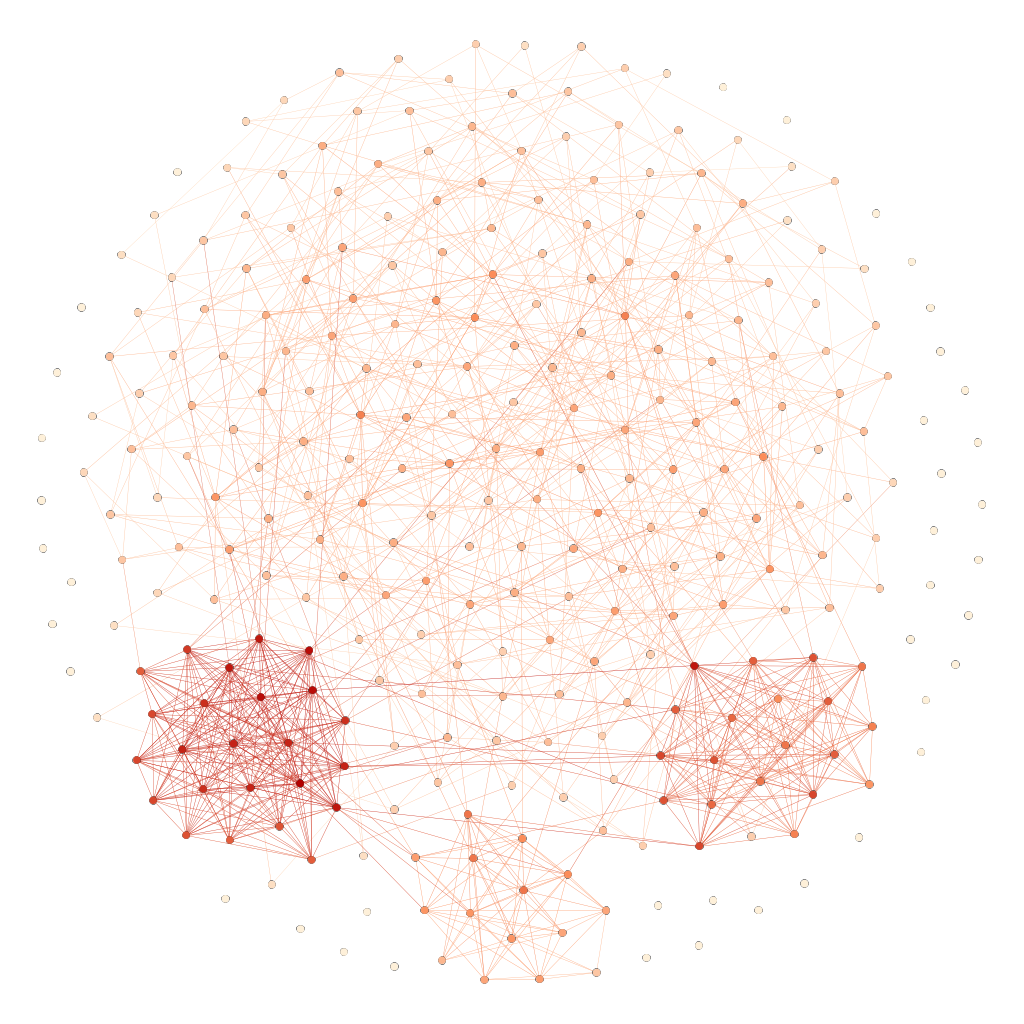

In [95]:
display.Image("./similar_graph.png")

In [108]:
cliques = list(nx.find_cliques(G))
print('Maximum clique size:', max([len(clique) for clique in cliques]))
for clique in cliques:
    if len(clique) == 11:
        print('Maximum clique:', clique)
        break

Maximal clique size: 11
Maximal clique: ['268500145', '120699597', '185623640', '246395556', '120266299', '136889266', '97494105', '355186611', '165466937', '158681334', '193602173']


In [127]:
# A k-core of a graph G is a maximal connected subgraph of G in which all vertices have degree at least k.

nodes_k_core = list(nx.k_core(G))
print('k =', min([G.degree[n] for n in nodes_k_core])) # main core 
print('Number of nodes', len(nodes_k_core))

k = 15
Number of nodes 24


In [ ]:
# A simple undirected graph with n vertices is a k-plex if the degree of each vertex of the graph is at least n − k